In [21]:
import pandas as pd

# 엑셀 파일 읽기
df = pd.read_excel('/Users/ijaein/Desktop/졸업프로젝트/사용손구분.xlsx')

# '손 사용' 열이 'Right'인 행들의 '단어명' 열 값을 추출
right_hand_words = df[df['손 사용'] == 'Right']['단어명'].tolist()

# 결과 출력
print(right_hand_words)
print(len(right_hand_words))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 112, 119, 1000, 10000, '가슴', '가시', '강', '걸렸다', '경찰', '곰', '공원', '놀이터', '구청', '귀', '금가다', '급류', '깔리다', '납치', '낫', '낯선남자', '낯선여자', '내일', '냄새나다', '누나', '누수', '다음', '달(월)', '독극물', '동생', '동전', '뒤통수', '등', '딸', '뜨거운물', '말벌', '머리', '목', '무릎', '물', '배', '복부', '벌', '범람', '복통', '볼', '삼키다', '수요일', '숨을안쉬다', '신고하세요(경찰)', '아들', '아빠', '알려주세요', '앞', '약국', '어깨', '어제', '어지러움', '언니', '얼굴', '엄마', '연기', '열', '옆쪽', '오른쪽', '오른쪽-귀', '오른쪽-눈', '오빠', '월요일', '위', '이마', '이물질', '주', '지난', '창백하다', '총', '친구', '코', '토하다', '할머니', '할아버지', '허리', '허벅지', '형', '호흡곤란', '호흡기', '화요일', '화장실']
188


## 시퀀스 확인

In [2]:
import glob
import numpy as np

seq_length = 60
actions = ['가렵다', '가스', '가슴', '각목', '갇히다']
           
           # , '갇히다', '감금', '감전', '강남구', '강동구', '강북구', '강서구', 
           # '강풍', '개', '거실', '결박', '경운기', '경찰차', '계곡', '계단', '고속도로', '고압전선', '고열', '고장', 
           # '부러지다', '골절', '탈골', '공사장', '공원', '놀이터', '공장', '관악구', '광진구', '교통사고', '구급대', 
           # '구급대원', '구급차', '구로구', '구해주세요', '금요일', '금천구', '급류', '기절', '기절하다', '깔리다', 
           # '끓는물', '남자친구', '남편', '남학생', '납치', '낯선남자', '낯선사람', '내년', '노원구', '논', '농약', 
           # '누전', '누출', '눈', '다리', '다음', '대문앞', '도둑', '절도', '도로', '도봉구', '독버섯', '독사', 
           # '동대문구', '동작구', '두드러기생기다', '딸', '떨어지다', '쓰러지다', '뜨거운물', '마당', '마포구', 
           # '말려주세요', '말벌', '맹견', '멧돼지', '목요일', '무너지다', '붕괴', '문틈', '밑에', '아래', '바다', 
           # '반점생기다', '발', '발가락', '발목', '발작', '방망이', '밭', '배고프다', '뱀', '범람', '벼락', '병원', 
           # '보건소', '보내주세요(경찰)', '보내주세요(구급차)', '복통', '부엌', '불', '불나다', '붕대', '비닐하우스', 
           # '비상약', '빌라', '뼈', '사이', '산', '살충제', '살해', '서대문구', '서랍', '서울시', '서초구', '선반', 
           # '선생님', '성동구', '성북구', '성폭행', '소방관', '소방차', '소화기', '소화전', '손', '손가락', '손목', 
           # '송파구', '수영장', '술취한 사람', '시청', '심장마비', '아기', '아이들', '어린이', '아내', '아저씨', 
           # '아줌마', '아파트', '인대', '안방', '알려주세요', '앞집', '약국', '약사', '양천구', '엘리베이터', '여자친구', 
           # '여학생', '연락해주세요', '열', '열나다', '열어주세요', '엽총', '영등포구', '옆집', '옆집 아저씨', '옆집 할아버지', 
           # '옆집사람', '오늘', '오른쪽', '옥상', '올해', '왼쪽', '욕실', '용산구', '우리집', '운동장', '위에', '위협', 
           # '윗집', '윗집사람', '유리', '유치원', '유치원 버스', '은평구', '음식물', '응급대원', '응급처리', '의사', 
           # '이물질', '이번', '이상한사람', '이웃집', '일요일', '임산부', '임신한아내', '자동차', '자살', '자상', 
           # '작년', '작은방', '장난감', '장단지', '절단', '제초제', '조난', '종로구', '중구', '중랑구', '지혈대', 
           # '진통제', '질식', '집', '집단폭행', '차밖', '차안', '창문', '창백하다', '체온계', '총', '추락', '축사', 
           # '출산', '출혈', '피나다', '친구', '침수', '칼', '코', '택시', '토요일', '토하다', '통학버스', '트랙터', 
           # '트럭', '파도', '파편', '팔', '팔꿈치', '폭발', '폭탄', '폭우', '폭행', '학교', '학생', '함몰되다', 
           # '해(연)', '해독제', '해열제', '현관', '현관앞', '협박', '호흡곤란', '홍수', '화상', '화약', '화재']

both_sequences, both_labels = [], []

for idx, action in enumerate(actions):
    both_files = glob.glob(f'dataset_v5/{action}_*.npy')
    
    
    print(f"Loading data for action: {action}")
    print(f"Both hand files: {both_files}")
    
        
    for file in both_files:
        data = np.load(file)
        print(f"Loaded {file} with shape: {data.shape}")
        if len(data) < seq_length:  # 최소 길이보다 짧으면 무시
            print(f"Skipping {file} as it is too short")
            continue
        if len(data) > seq_length:  # 최대 길이보다 길면 자르기
            data = data[:seq_length]
        both_sequences.append(data)
        both_labels.append(idx)
    

# 데이터 로드 결과 확인
print("Both hand data count:", len(both_sequences))

# 각 액션별 데이터 분포 확인
print("Data distribution:", {action: both_labels.count(idx) for idx, action in enumerate(actions)})
# print("Data distribution:", {action: left_labels.count(idx) for idx, action in enumerate(actions)})


Loading data for action: 가렵다
Both hand files: ['dataset_v5/가렵다_1729054687253_left.npy', 'dataset_v5/가렵다_1729038215465_left.npy', 'dataset_v5/가렵다_1729083475536_right.npy', 'dataset_v5/가렵다_1728851528489_right.npy', 'dataset_v5/가렵다_1729088088041_right.npy', 'dataset_v5/가렵다_1729049267794_right.npy', 'dataset_v5/가렵다_1728873945834_left.npy', 'dataset_v5/가렵다_1728904575843_left.npy', 'dataset_v5/가렵다_1728844091991_left.npy', 'dataset_v5/가렵다_1729073093164_right.npy', 'dataset_v5/가렵다_1728835420737_left.npy', 'dataset_v5/가렵다_1728996189060_right.npy', 'dataset_v5/가렵다_1728864410037_right.npy', 'dataset_v5/가렵다_1729038215465_right.npy', 'dataset_v5/가렵다_1728869075758_right.npy', 'dataset_v5/가렵다_1729043902867_left.npy', 'dataset_v5/가렵다_1728859988094_left.npy', 'dataset_v5/가렵다_1728844091991_right.npy', 'dataset_v5/가렵다_1728859988094_right.npy', 'dataset_v5/가렵다_1728830924262_right.npy', 'dataset_v5/가렵다_1728897494956_right.npy', 'dataset_v5/가렵다_1729043902867_right.npy', 'dataset_v5/가렵다_1728913552077_left.np

## 양손 데이터

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import glob

# 시퀀스 길이 정의
seq_length = 30  # 원하는 시퀀스 길이로 설정

# 단어 목록 정의 (각 단어가 하나의 action에 대응)
actions = ['가렵다', '가스', '가슴', '각목', '갇히다', '감금', '감전', '강남구', '강동구', '강북구', '강서구', 
           '강풍', '개', '거실', '결박', '경운기', '경찰차', '계곡', '계단', '고속도로', '고압전선', '고열', '고장', 
           '부러지다', '골절', '탈골', '공사장', '공원', '놀이터', '공장', '관악구', '광진구', '교통사고', '구급대', 
           '구급대원', '구급차', '구로구', '구해주세요', '금요일', '금천구', '급류', '기절', '기절하다', '깔리다', 
           '끓는물', '남자친구', '남편', '남학생', '납치', '낯선남자', '낯선사람', '내년', '노원구', '논', '농약', 
           '누전', '누출', '눈', '다리', '다음', '대문앞', '도둑', '절도', '도로', '도봉구', '독버섯', '독사', 
           '동대문구', '동작구', '두드러기생기다', '딸', '떨어지다', '쓰러지다', '뜨거운물', '마당', '마포구', 
           '말려주세요', '말벌', '맹견', '멧돼지', '목요일', '무너지다', '붕괴', '문틈', '밑에', '아래', '바다', 
           '반점생기다', '발', '발가락', '발목', '발작', '방망이', '밭', '배고프다', '뱀', '범람', '벼락', '병원', 
           '보건소', '보내주세요(경찰)', '보내주세요(구급차)', '복통', '부엌', '불', '불나다', '붕대', '비닐하우스', 
           '비상약', '빌라', '뼈', '사이', '산', '살충제', '살해', '서대문구', '서랍', '서울시', '서초구', '선반', 
           '선생님', '성동구', '성북구', '성폭행', '소방관', '소방차', '소화기', '소화전', '손', '손가락', '손목', 
           '송파구', '수영장', '술취한 사람', '시청', '심장마비', '아기', '아이들', '어린이', '아내', '아저씨', 
           '아줌마', '아파트', '인대', '안방', '알려주세요', '앞집', '약국', '약사', '양천구', '엘리베이터', '여자친구', 
           '여학생', '연락해주세요', '열', '열나다', '열어주세요', '엽총', '영등포구', '옆집', '옆집 아저씨', '옆집 할아버지', 
           '옆집사람', '오늘', '오른쪽', '옥상', '올해', '왼쪽', '욕실', '용산구', '우리집', '운동장', '위에', '위협', 
           '윗집', '윗집사람', '유리', '유치원', '유치원 버스', '은평구', '음식물', '응급대원', '응급처리', '의사', 
           '이물질', '이번', '이상한사람', '이웃집', '일요일', '임산부', '임신한아내', '자동차', '자살', '자상', 
           '작년', '작은방', '장난감', '장단지', '절단', '제초제', '조난', '종로구', '중구', '중랑구', '지혈대', 
           '진통제', '질식', '집', '집단폭행', '차밖', '차안', '창문', '창백하다', '체온계', '총', '추락', '축사', 
           '출산', '출혈', '피나다', '친구', '침수', '칼', '코', '택시', '토요일', '토하다', '통학버스', '트랙터', 
           '트럭', '파도', '파편', '팔', '팔꿈치', '폭발', '폭탄', '폭우', '폭행', '학교', '학생', '함몰되다', 
           '해(연)', '해독제', '해열제', '현관', '현관앞', '협박', '호흡곤란', '홍수', '화상', '화약', '화재']

both_sequences, both_labels = [], []

for idx, action in enumerate(actions):
    for file in glob.glob(f'dataset_both/{action}_*.npy'):  # 모든 timestamp 포함
        data = np.load(file)
        if len(data) < seq_length:  # 최소 길이보다 짧으면 패딩 추가
            data = np.pad(data, ((0, seq_length - len(data)), (0, 0)), 'constant')
        elif len(data) > seq_length:  # 최대 길이보다 길면 자르기
            data = data[:seq_length]
        both_sequences.append(data)

        # 라벨 추가
        both_labels.append(idx)

# 각 시퀀스의 피처 수를 확인하여 최대 피처 수를 설정합니다
max_features = max([data.shape[1] for data in both_sequences])

# 피처 수를 맞추기 위해 추가 패딩
both_sequences = [np.pad(data, ((0, 0), (0, max_features - data.shape[1])), 'constant') for data in both_sequences]

# NumPy 배열로 변환
X_both = np.array(both_sequences)
y_both = tf.keras.utils.to_categorical(both_labels)

# 데이터 분리 (학습, 검증, 테스트)
X_both_train, X_both_temp, y_both_train, y_both_temp = train_test_split(X_both, y_both, test_size=0.2, random_state=42)
X_both_val, X_both_test, y_both_val, y_both_test = train_test_split(X_both_temp, y_both_temp, test_size=0.5, random_state=42)

# 데이터 분리 결과 출력
print(f"양손 데이터 - 학습: {len(X_both_train)}, 검증: {len(X_both_val)}, 테스트: {len(X_both_test)}")

양손 데이터 - 학습: 17324, 검증: 2165, 테스트: 2166


## 양손 모델

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        81,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 252)            │        16,380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,228 (528.23 KB)

 Trainable params: 134,972 (527.23 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
541/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0283 - loss: 5.1898
Epoch 1: val_accuracy improved from -inf to 0.04804, saving model to best_both_model_video_c.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0283 - loss: 5.1882 - val_accuracy: 0.0480 - val_loss: 4.6696 - learning_rate: 0.0010
Epoch 2/500
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1433 - loss: 3.6913
Epoch 2: val_accuracy improved from 0.04804 to 0.24018, saving model to best_both_model_video_c.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.1433 - loss: 3.6908 - val_accuracy: 0.2402 - val_loss: 2.9222 - learning_rate: 0.0010
Epoch 3/500
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2830 - loss: 2.7266
Epoch 3: val_accuracy improved from 0.24018 to 0.35473, saving model to best_both_model_video_c.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2831 - loss: 2.7263 - val_accuracy: 0.3547 - val_loss: 2.4219 - learning_rate: 0.0010
Epoch 

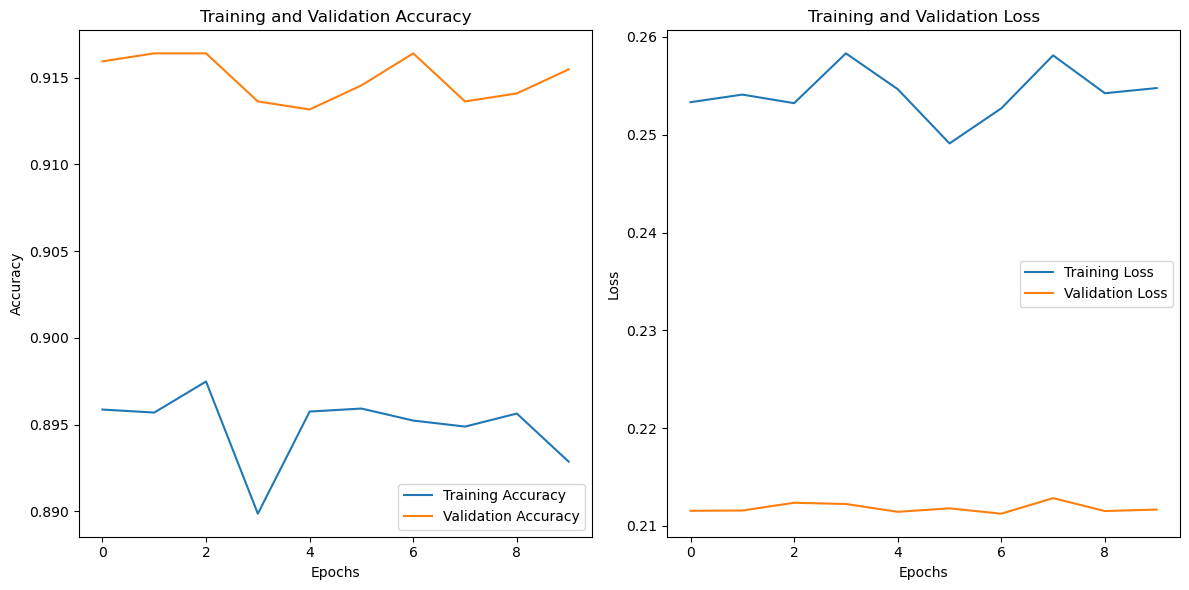

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9333 - loss: 0.1435
Best Both hand model evaluation - Loss: 0.15020306408405304, Accuracy: 0.9261311292648315


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# 모델 정의 함수
def create_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape),
        BatchNormalization(),  # 추가된 BatchNormalization
        Dropout(0.3),  # 드롭아웃 비율 약간 증가
        LSTM(64, return_sequences=False, activation='relu'),
        BatchNormalization(),  # 추가된 BatchNormalization
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 하이퍼파라미터 설정
learning_rate = 0.001
batch_size = 32
epochs = 500

# 모델 정의
both_model = create_model((seq_length, max_features), len(actions))
both_model.summary()

# 콜백 설정
checkpoint = ModelCheckpoint('best_both_model_video_c.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 모델 학습
both_model.fit(
    X_both_train, y_both_train, 
    epochs=epochs, 
    validation_data=(X_both_val, y_both_val),  # 검증 데이터 사용
    batch_size=batch_size,  # 배치 크기
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

# 가장 높은 정확도를 가진 모델 불러오기
best_both_model = tf.keras.models.load_model('best_both_model_video_c.keras')

# 양손 모델 평가
both_eval = best_both_model.evaluate(X_both_test, y_both_test)
print(f"Best Both hand model evaluation - Loss: {both_eval[0]}, Accuracy: {both_eval[1]}")

## 오른손, 왼손 데이터

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import glob

# 시퀀스 길이 정의
seq_length = 60  # 원하는 시퀀스 길이로 설정

# 데이터 로드
action_r = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '112', '119', '1000', '10000', '가슴', '가시', '강', '걸렸다', '경찰', '곰', '공원', '놀이터', '구청', '귀', '금가다', '급류', '깔리다', '납치', '낫', '낯선남자', '낯선여자', '내일', '냄새나다', '누나', '누수', '다음', '달(월)', '독극물', '동생', '동전', '뒤통수', '등', '딸', '뜨거운물', '말벌', '머리', '목', '무릎', '물', '배', '복부', '벌', '범람', '복통', '볼', '삼키다', '수요일', '숨을안쉬다', '신고하세요(경찰)', '아들', '아빠', '알려주세요', '앞', '약국', '어깨', '어제', '어지러움', '언니', '얼굴', '엄마', '연기', '열', '옆쪽', '오른쪽', '오른쪽-귀', '오른쪽-눈', '오빠', '월요일', '위', '이마', '이물질', '주', '지난', '창백하다', '총', '친구', '코', '토하다', '할머니', '할아버지', '허리', '허벅지', '형', '호흡곤란', '호흡기', '화요일', '화장실']
action_l = ['왼쪽-귀', '왼쪽-눈']

right_sequences, right_labels = [], []
left_sequences, left_labels = [], []

# 오른손 데이터 처리
for idx, action in enumerate(action_r):
    for file in glob.glob(f'dataset_v5/{action}_*_right*.npy'):
        data = np.load(file)
        if len(data) < seq_length:  # 최소 길이보다 짧으면 패딩 추가
            data = np.pad(data, ((0, seq_length - len(data)), (0, 0)), 'constant')
        elif len(data) > seq_length:  # 최대 길이보다 길면 자르기
            data = data[:seq_length]
        right_sequences.append(data)
        right_labels.append(idx)  # 오른손 레이블 추가

# 왼손 데이터 처리
for idx, action in enumerate(action_l):
    for file in glob.glob(f'dataset_v5/{action}_*_left*.npy'):
        data = np.load(file)
        if len(data) < seq_length:  # 최소 길이보다 짧으면 패딩 추가
            data = np.pad(data, ((0, seq_length - len(data)), (0, 0)), 'constant')
        elif len(data) > seq_length:  # 최대 길이보다 길면 자르기
            data = data[:seq_length]
        left_sequences.append(data)
        left_labels.append(idx)  # 왼손 레이블 추가

# 각 시퀀스의 피처 수를 확인하여 최대 피처 수를 설정합니다
max_features = max([data.shape[1] for data in right_sequences + left_sequences])

# 피처 수를 맞추기 위해 추가 패딩
right_sequences = [np.pad(data, ((0, 0), (0, max_features - data.shape[1])), 'constant') for data in right_sequences]
left_sequences = [np.pad(data, ((0, 0), (0, max_features - data.shape[1])), 'constant') for data in left_sequences]

# NumPy 배열로 변환
X_right = np.array(right_sequences)
y_right = tf.keras.utils.to_categorical(right_labels)

X_left = np.array(left_sequences)
y_left = tf.keras.utils.to_categorical(left_labels)

# 데이터 분리 (학습, 검증, 테스트)
X_right_train, X_right_temp, y_right_train, y_right_temp = train_test_split(X_right, y_right, test_size=0.2, random_state=42)
X_right_val, X_right_test, y_right_val, y_right_test = train_test_split(X_right_temp, y_right_temp, test_size=0.5, random_state=42)

X_left_train, X_left_temp, y_left_train, y_left_temp = train_test_split(X_left, y_left, test_size=0.2, random_state=42)
X_left_val, X_left_test, y_left_val, y_left_test = train_test_split(X_left_temp, y_left_temp, test_size=0.5, random_state=42)

# 데이터 분리 결과 출력
print(f"오른손 데이터 - 학습: {len(X_right_train)}, 검증: {len(X_right_val)}, 테스트: {len(X_right_test)}")
print(f"왼손 데이터 - 학습: {len(X_left_train)}, 검증: {len(X_left_val)}, 테스트: {len(X_left_test)}")

오른손 데이터 - 학습: 11737, 검증: 1467, 테스트: 1468
왼손 데이터 - 학습: 841, 검증: 105, 테스트: 106


## 오른손 모델

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


# 모델 정의 함수
def create_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape),
        BatchNormalization(),  # 추가된 BatchNormalization
        Dropout(0.3),  # 드롭아웃 비율 약간 증가
        LSTM(64, return_sequences=False, activation='relu'),
        BatchNormalization(),  # 추가된 BatchNormalization
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 하이퍼파라미터 설정
learning_rate = 0.001
batch_size = 32
epochs = 500

# 모델 정의
right_model = create_model((seq_length, max_features), len(action_r))
right_model.summary()

# 콜백 설정
checkpoint = ModelCheckpoint('right_model_06.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 모델 학습
right_model.fit(
    X_right_train, y_right_train, 
    epochs=epochs, 
    validation_data=(X_right_val, y_right_val),  # 검증 데이터 사용
    batch_size=batch_size,  # 배치 크기
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

# 가장 높은 정확도를 가진 모델 불러오기
best_right_model = tf.keras.models.load_model('right_model_06.keras')

# 오른손 모델 평가
right_eval = best_right_model.evaluate(X_right_test, y_right_test)
print(f"Best Right hand model evaluation - Loss: {right_eval[0]}, Accuracy: {right_eval[1]}")
# # 모델 정의
# right_model = create_model((seq_length, num_features), len(actions))
# right_model.summary()

# # 콜백 설정
# checkpoint = ModelCheckpoint('best_right_model_video2.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# # 모델 학습
# right_model.fit(
#     X_right_train, y_right_train, 
#     epochs=epochs, 
#     validation_data=(X_right_val, y_right_val),  # 검증 데이터 사용
#     batch_size=batch_size,  # 배치 크기
#     callbacks=[checkpoint, reduce_lr, early_stopping]
# )

# # 가장 높은 정확도를 가진 모델 불러오기
# best_right_model = tf.keras.models.load_model('best_right_model_video_c.keras')

# # 오른손 모델 평가
# right_eval = best_right_model.evaluate(X_right_test, y_right_test)
# print(f"Best Right hand model evaluation - Loss: {right_eval[0]}, Accuracy: {right_eval[1]}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        38,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 188)            │        12,220 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,060 (343.98 KB)

 Trainable params: 87,804 (342.98 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
365/367 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0115 - loss: 5.2753
Epoch 1: val_accuracy improved from -inf to 0.01431, saving model to right_model_06.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.0115 - loss: 5.2745 - val_accuracy: 0.0143 - val_loss: 5.2064 - learning_rate: 0.0010
Epoch 2/500
365/367 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0348 - loss: 4.7147
Epoch 2: val_accuracy improved from 0.01431 to 0.05044, saving model to right_model_06.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.0349 - loss: 4.7131 - val_accuracy: 0.0504 - val_loss: 4.4149 - learning_rate: 0.0010
Epoch 3/500
365/367 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0798 - loss: 3.9474
Epoch 3: val_accuracy improved from 0.05044 to 0.07294, saving model to right_model_06.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.0799 - loss: 3.9463 - val_accuracy: 0.0729 - val_loss: 3.9681 - learning_rate: 0.0010
Epoch 4/500
366/367 ━━━━━━━━━━━━━

## 왼손 모델

In [10]:
# 왼손 모델 정의
left_model = create_model((seq_length, max_features), len(action_l))
left_model.summary()

# 콜백 설정 (왼손 모델을 위한 체크포인트 설정)
# 콜백 설정 (왼손 모델을 위한 체크포인트 설정)
left_checkpoint = ModelCheckpoint('left_model_05.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 왼손 모델 학습
left_model.fit(
    X_left_train, y_left_train,
    epochs=epochs,
    validation_data=(X_left_val, y_left_val),
    batch_size=batch_size,
    callbacks=[left_checkpoint, reduce_lr, early_stopping]
)

# 가장 높은 정확도를 가진 왼손 모델 불러오기
best_left_model = tf.keras.models.load_model('left_model_05.keras')

# 왼손 모델 평가
left_eval = best_left_model.evaluate(X_left_test, y_left_test)
print(f"Best Left hand model evaluation - Loss: {left_eval[0]}, Accuracy: {left_eval[1]}")



# # 왼손 모델 정의
# left_model = create_model((seq_length, max_features), len(action_l))  
# left_model.summary()

# # 콜백 설정 (왼손 모델을 위한 체크포인트 설정)
# left_checkpoint = ModelCheckpoint('best_left_model_video2_c.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# # 왼손 모델 학습
# left_model.fit(
#     X_left_train, y_left_train,
#     epochs=epochs,
#     validation_data=(X_left_val, y_left_val),
#     batch_size=batch_size,
#     callbacks=[left_checkpoint, reduce_lr, early_stopping]
# )

# # 가장 높은 정확도를 가진 왼손 모델 불러오기
# best_left_model = tf.keras.models.load_model('best_left_model_video2_c.keras')

# # 왼손 모델 평가
# left_eval = best_left_model.evaluate(X_left_test, y_left_test)
# print(f"Best Left hand model evaluation - Loss: {left_eval[0]}, Accuracy: {left_eval[1]}")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 60, 64)         │        38,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,970 (296.76 KB)

 Trainable params: 75,714 (295.76 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5151 - loss: 0.8892
Epoch 1: val_accuracy improved from -inf to 0.47619, saving model to left_model_05.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5144 - loss: 0.8833 - val_accuracy: 0.4762 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 2/500
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5406 - loss: 0.7337
Epoch 2: val_accuracy did not improve from 0.47619
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5396 - loss: 0.7346 - val_accuracy: 0.4762 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 3/500
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5636 - loss: 0.6929
Epoch 3: val_accuracy did not improve from 0.47619
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5634 - loss: 0.6936 - val_accuracy: 0.4762 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 4/500
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5781 - loss: 0.7204
Epoch 4: val_accuracy improved from 0.47619 t

In [13]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model1 = load_model('right_model_05.keras')
model2 = load_model('left_model_05.keras')

y_pred1 = model1.predict(X_right_test)

print(multilabel_confusion_matrix(np.argmax(y_right_test, axis=1), np.argmax(y_pred1, axis=1)))

y_pred2 = model2.predict(X_left_test)

print(multilabel_confusion_matrix(np.argmax(y_left_test, axis=1), np.argmax(y_pred2, axis=1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[[729   0]
  [  0   5]]

 [[726   2]
  [  1   5]]

 [[727   0]
  [  0   7]]

 [[731   0]
  [  0   3]]

 [[729   0]
  [  0   5]]

 [[728   0]
  [  0   6]]

 [[730   0]
  [  2   2]]

 [[732   0]
  [  0   2]]

 [[726   0]
  [  1   7]]

 [[732   1]
  [  0   1]]

 [[729   0]
  [  0   5]]

 [[728   2]
  [  1   3]]

 [[727   0]
  [  0   7]]

 [[727   0]
  [  0   7]]

 [[733   0]
  [  0   1]]

 [[731   0]
  [  1   2]]

 [[731   0]
  [  1   2]]

 [[728   1]
  [  0   5]]

 [[729   0]
  [  1   4]]

 [[728   0]
  [  0   6]]

 [[732   0]
  [  0   2]]

 [[732   0]
  [  0   2]]

 [[731   0]
  [  0   3]]

 [[730   0]
  [  0   4]]

 [[726   0]
  [  0   8]]

 [[728   0]
  [  0   6]]

 [[733   0]
  [  0   1]]

 [[732   0]
  [  0   2]]

 [[728   0]
  [  0   6]]

 [[729   0]
  [  0   5]]

 [[731   0]
  [  0   3]]

 [[731   0]
  [  0   3]]

 [[733   0]
  [  0   1]]

 [[727   0]
  [  0   7]]

 [[728   0]
  [  0   6]]

 [[731   0]
  [  0   3]]

 [[727   0]
  [  0   7]]

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 60, 64)         │        38,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,970 (296.76 KB)

 Trainable params: 75,714 (295.76 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500


/var/folders/nm/j7g3s6y93198279398pvm2p40000gn/T/ipykernel_58711/74618574.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5447 - loss: 0.9033
Epoch 1: val_accuracy improved from -inf to 0.45833, saving model to left_model_05.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5425 - loss: 0.9007 - val_accuracy: 0.4583 - val_loss: 0.7015 - learning_rate: 0.0010
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5113 - loss: 0.7856
Epoch 2: val_accuracy did not improve from 0.45833
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5126 - loss: 0.7856 - val_accuracy: 0.4583 - val_loss: 0.7073 - learning_rate: 0.0010
Epoch 3/500
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5300 - loss: 0.7669
Epoch 3: val_accuracy did not improve from 0.45833
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5347 - loss: 0.7611 - val_accuracy: 0.4583 - val_loss: 0.7063 - learning_rate: 0.0010
Epoch 4/500
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5882 - loss: 0.6766
Epoch 4: val_accuracy did not improve from 0.45833
12/12 

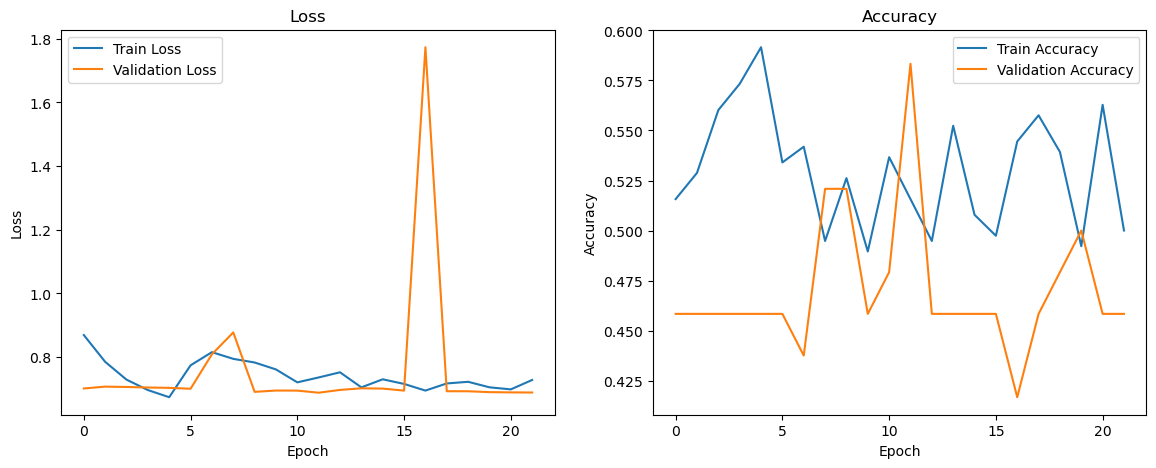

In [23]:
# 왼손 모델 설정
left_model = create_model((seq_length, max_features), len(action_l))
left_model.summary()

# 콜백 설정
left_checkpoint = ModelCheckpoint('left_model_05.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
plot_callback = TrainingPlot()

# 모델 학습
left_model.fit(
    X_left_train, y_left_train,
    epochs=epochs,
    validation_data=(X_left_val, y_left_val),
    batch_size=batch_size,
    callbacks=[left_checkpoint, reduce_lr, early_stopping, plot_callback]
)

# 가장 높은 정확도를 가진 모델 불러오기
best_left_model = tf.keras.models.load_model('left_model_05.keras')

# 왼손 모델 평가
left_eval = best_left_model.evaluate(X_left_test, y_left_test)
print(f"Best Left hand model evaluation - Loss: {left_eval[0]}, Accuracy: {left_eval[1]}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 64)         │        81,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 252)            │        16,380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,228 (528.23 KB)

 Trainable params: 134,972 (527.23 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
540/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0240 - loss: 5.2208
Epoch 1: val_accuracy improved from -inf to 0.07575, saving model to best_both_model_video_c.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0241 - loss: 5.2185 - val_accuracy: 0.0758 - val_loss: 4.3328 - learning_rate: 0.0010
Epoch 2/500
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1296 - loss: 3.7590
Epoch 2: val_accuracy improved from 0.07575 to 0.24111, saving model to best_both_model_video_c.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.1297 - loss: 3.7586 - val_accuracy: 0.2411 - val_loss: 3.0693 - learning_rate: 0.0010
Epoch 3/500
539/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2653 - loss: 2.8924
Epoch 3: val_accuracy did not improve from 0.24111
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2654 - loss: 2.8914 - val_accuracy: 0.2176 - val_loss: 3.2411 - learning_rate: 0.0010
Epoch 4/500
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - a

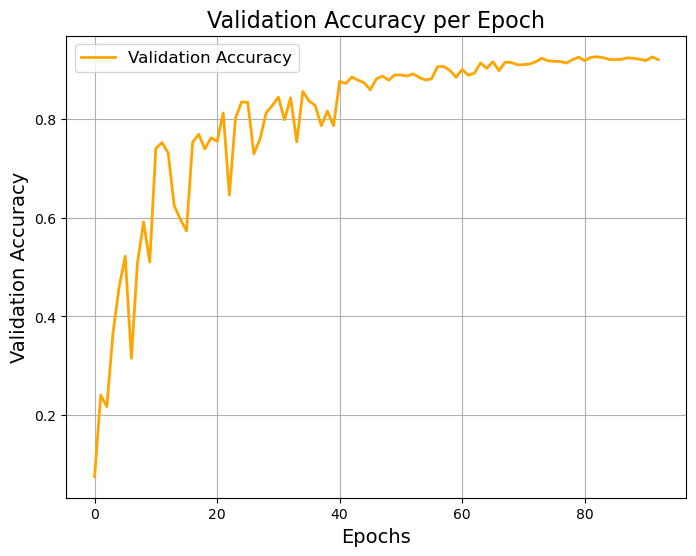

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9229 - loss: 0.1426
Best Both hand model evaluation - Loss: 0.15060649812221527, Accuracy: 0.9219759702682495


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# 모델 정의 함수
def create_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape),
        BatchNormalization(),  # 추가된 BatchNormalization
        Dropout(0.3),  # 드롭아웃 비율 약간 증가
        LSTM(64, return_sequences=False, activation='relu'),
        BatchNormalization(),  # 추가된 BatchNormalization
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 하이퍼파라미터 설정
learning_rate = 0.001
batch_size = 32
epochs = 500

# 모델 정의
both_model = create_model((seq_length, max_features), len(actions))
both_model.summary()

# 콜백 설정
checkpoint = ModelCheckpoint('best_both_model_video_c.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 모델 학습
history = both_model.fit(
    X_both_train, y_both_train, 
    epochs=epochs, 
    validation_data=(X_both_val, y_both_val),  # 검증 데이터 사용
    batch_size=batch_size,  # 배치 크기
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

# 검증 정확도 시각화
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Validation Accuracy per Epoch', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 가장 높은 정확도를 가진 모델 불러오기
best_both_model = tf.keras.models.load_model('best_both_model_video_c.keras')

# 양손 모델 평가
both_eval = best_both_model.evaluate(X_both_test, y_both_test)
print(f"Best Both hand model evaluation - Loss: {both_eval[0]}, Accuracy: {both_eval[1]}")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 60, 64)         │        38,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 188)            │        12,220 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,060 (343.98 KB)

 Trainable params: 87,804 (342.98 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
366/367 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0057 - loss: 5.3216
Epoch 1: val_accuracy improved from -inf to 0.00682, saving model to right_model_06.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.0057 - loss: 5.3214 - val_accuracy: 0.0068 - val_loss: 5.3078 - learning_rate: 0.0010
Epoch 2/500
366/367 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0125 - loss: 5.1587
Epoch 2: val_accuracy improved from 0.00682 to 0.00750, saving model to right_model_06.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.0125 - loss: 5.1586 - val_accuracy: 0.0075 - val_loss: 5.2210 - learning_rate: 0.0010
Epoch 3/500
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0140 - loss: 5.1091
Epoch 3: val_accuracy improved from 0.00750 to 0.00818, saving model to right_model_06.keras
367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.0140 - loss: 5.1091 - val_accuracy: 0.0082 - val_loss: 5.1947 - learning_rate: 0.0010
Epoch 4/500
366/367 ━━━━━━━━━━━━

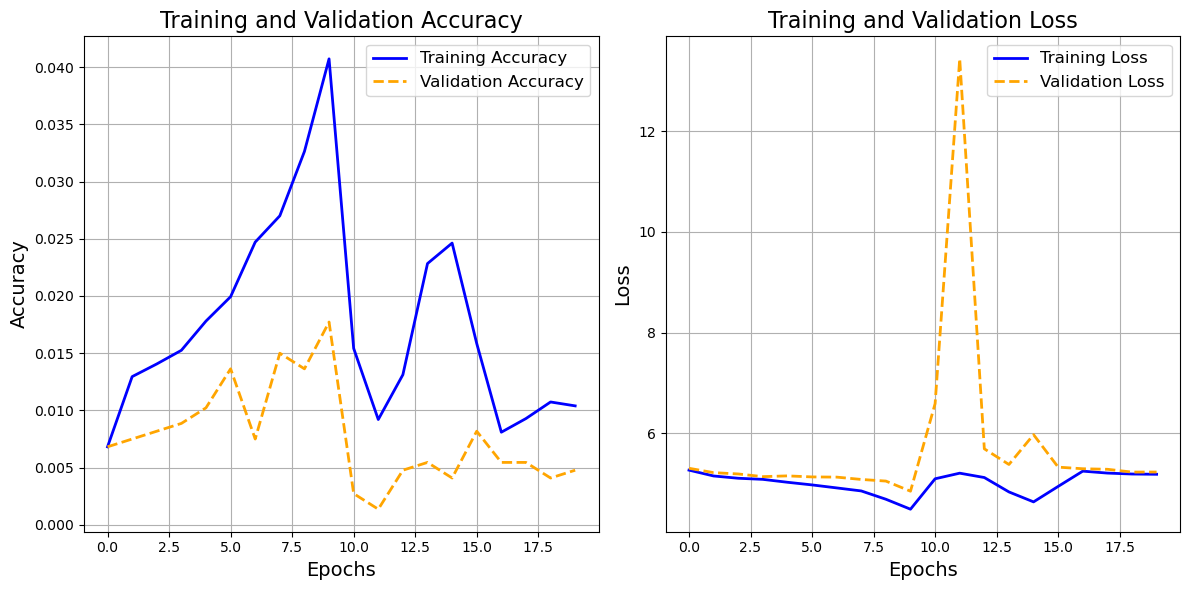

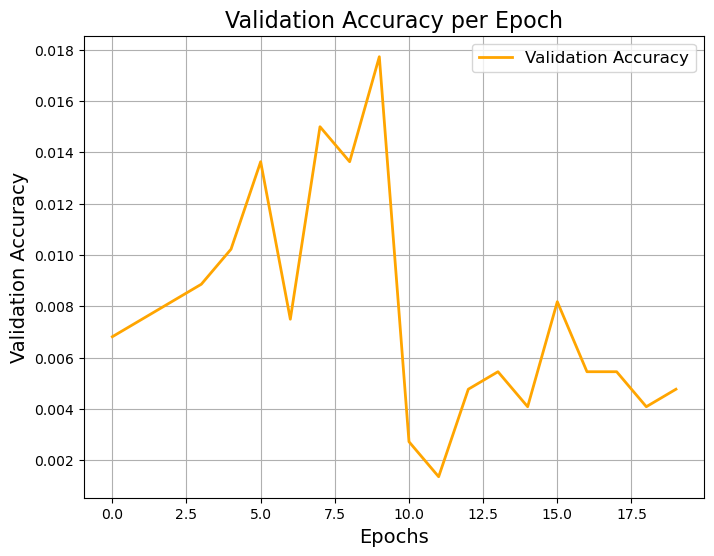

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0144 - loss: 4.8460
Best Right hand model evaluation - Loss: 4.834417343139648, Accuracy: 0.012942778877913952


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# 모델 정의 함수
def create_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64, return_sequences=False, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 하이퍼파라미터 설정
learning_rate = 0.001
batch_size = 32
epochs = 500

# 모델 정의
right_model = create_model((seq_length, max_features), len(action_r))
right_model.summary()

# 콜백 설정
checkpoint = ModelCheckpoint('right_model_06.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 모델 학습
history = right_model.fit(
    X_right_train, y_right_train, 
    epochs=epochs, 
    validation_data=(X_right_val, y_right_val),  
    batch_size=batch_size,  
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

# 전체 학습 및 검증 과정 시각화
plt.figure(figsize=(12, 6))

# 학습 및 검증 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# 학습 및 검증 손실
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# 검증 정확도만 시각화
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Validation Accuracy per Epoch', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 가장 높은 정확도를 가진 모델 불러오기
best_right_model = tf.keras.models.load_model('right_model_06.keras')

# 오른손 모델 평가
right_eval = best_right_model.evaluate(X_right_test, y_right_test)
print(f"Best Right hand model evaluation - Loss: {right_eval[0]}, Accuracy: {right_eval[1]}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 60, 64)         │        38,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,970 (296.76 KB)

 Trainable params: 75,714 (295.76 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5494 - loss: 0.8251
Epoch 1: val_accuracy improved from -inf to 0.56190, saving model to left_model_08.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5499 - loss: 0.8208 - val_accuracy: 0.5619 - val_loss: 0.6912 - learning_rate: 0.0010
Epoch 2/500
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5404 - loss: 0.7460
Epoch 2: val_accuracy did not improve from 0.56190
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5415 - loss: 0.7448 - val_accuracy: 0.4286 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 3/500
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5640 - loss: 0.7723
Epoch 3: val_accuracy did not improve from 0.56190
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5631 - loss: 0.7695 - val_accuracy: 0.5238 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 4/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5257 - loss: 0.7257
Epoch 4: val_accuracy did not improve from 0.

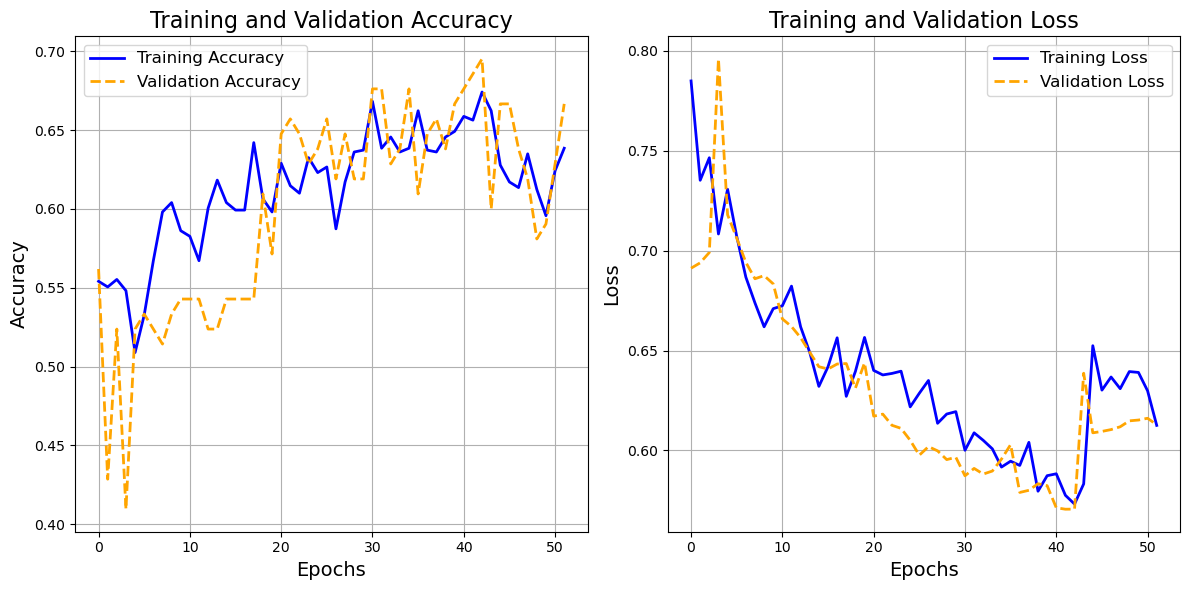

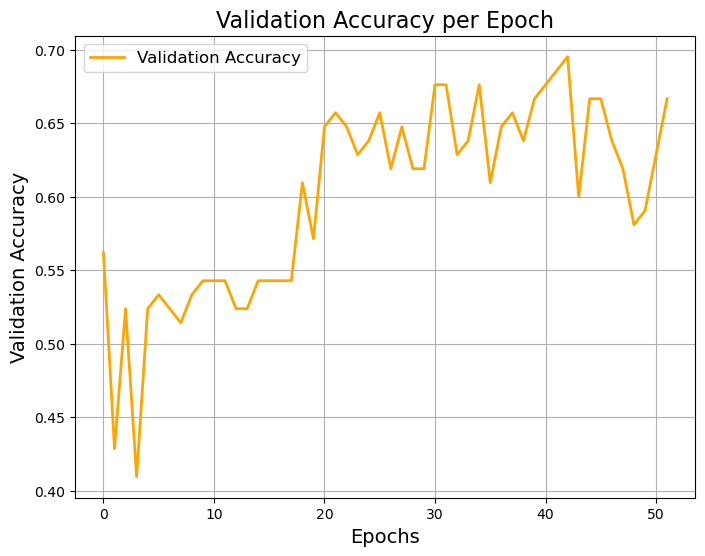

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7658 - loss: 0.5184  
Best Left hand model evaluation - Loss: 0.5264765024185181, Accuracy: 0.7452830076217651


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# 모델 정의 함수
def create_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64, return_sequences=False, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 왼손 모델 설정
left_model = create_model((seq_length, max_features), len(action_l))
left_model.summary()

# 콜백 설정
left_checkpoint = ModelCheckpoint('left_model_08.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# 모델 학습
history = left_model.fit(
    X_left_train, y_left_train,
    epochs=epochs,
    validation_data=(X_left_val, y_left_val),
    batch_size=batch_size,
    callbacks=[left_checkpoint, reduce_lr, early_stopping]
)

# 학습 및 검증 과정 시각화
plt.figure(figsize=(12, 6))

# 학습 및 검증 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# 학습 및 검증 손실
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# 검증 정확도만 시각화
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Validation Accuracy per Epoch', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 가장 높은 정확도를 가진 모델 불러오기
best_left_model = tf.keras.models.load_model('left_model_08.keras')

# 왼손 모델 평가
left_eval = best_left_model.evaluate(X_left_test, y_left_test)
print(f"Best Left hand model evaluation - Loss: {left_eval[0]}, Accuracy: {left_eval[1]}")